In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Read Data
# Load the dataset
data = pd.read_csv("/content/task 2.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Step 2: Data Cleaning and Preprocessing
# 2.1 Handle Missing Values
# Convert 'TotalCharges' to numeric and fill missing values with the mean
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.fillna(data.mean(), inplace=True)
# 2.2 Encode Categorical Variables Using One-Hot Encoding
# Define categorical columns for one-hot encoding
categorical_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]
# Perform one-hot encoding
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

<ipython-input-3-e1bc6bdd07de>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [4]:
# Step 3: Split Data into Training and Testing Sets
# Features and target variable
X = data.drop(['Churn', 'customerID'], axis=1)  # Features, excluding 'customerID'
y = data['Churn']  # Target variable
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Step 4: Model Selection and Evaluation
# Define a dictionary of models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}
# Initialize variables for best model and accuracy
best_model = None
best_accuracy = 0
# Iterate through models and perform cross-validated evaluation
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
    mean_accuracy = scores.mean()
    print(f'{model_name} Cross-Validated Accuracy: {mean_accuracy}')
    # Update best model if higher accuracy is found
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_model = model_name

print(f'Best Model: {best_model}')
print(f'Best Model Accuracy: {best_accuracy}')

Random Forest Cross-Validated Accuracy: 0.7894923677671281
Logistic Regression Cross-Validated Accuracy: 0.7981895633652822
Gradient Boosting Cross-Validated Accuracy: 0.7987220447284344
K-Nearest Neighbors Cross-Validated Accuracy: 0.762158324458644
Support Vector Machine Cross-Validated Accuracy: 0.7344692935747249
Naive Bayes Cross-Validated Accuracy: 0.6565495207667732
Decision Tree Cross-Validated Accuracy: 0.7385516506922257
Best Model: Gradient Boosting
Best Model Accuracy: 0.7987220447284344


In [6]:
# Step 5: Train and Evaluate Best Model on Test Set
# Train the best model on the entire training set
final_model = models[best_model]
final_model.fit(X_train, y_train)
# Predict on the test set
y_pred = final_model.predict(X_test)
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on Test Set: {accuracy}')

Accuracy on Test Set: 0.8119233498935415


In [7]:
# Step 6: Address Class Imbalance with SMOTE
# Perform SMOTE for class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Train the best model on the resampled data
final_model_resampled = models[best_model]
final_model_resampled.fit(X_train_resampled, y_train_resampled)
# Predict on the test set
y_pred_resampled = final_model_resampled.predict(X_test)
# Evaluate accuracy after SMOTE
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
print(f'Accuracy on Test Set after SMOTE: {accuracy_resampled}')

Accuracy on Test Set after SMOTE: 0.7757274662881476


In [8]:
# Data Visualization
# Table
print(data.head())

   customerID  SeniorCitizen  tenure  MonthlyCharges  TotalCharges Churn  \
0  7590-VHVEG              0       1           29.85         29.85    No   
1  5575-GNVDE              0      34           56.95       1889.50    No   
2  3668-QPYBK              0       2           53.85        108.15   Yes   
3  7795-CFOCW              0      45           42.30       1840.75    No   
4  9237-HQITU              0       2           70.70        151.65   Yes   

   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  ...  \
0            0            1               0                 0  ...   
1            1            0               0                 1  ...   
2            1            0               0                 1  ...   
3            1            0               0                 0  ...   
4            0            0               0                 1  ...   

   StreamingTV_No internet service  StreamingTV_Yes  \
0                                0                0   
1           

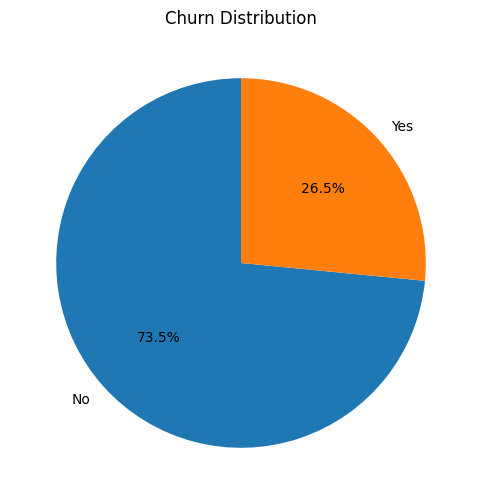

In [9]:
# Pie Chart
churn_counts = data['Churn'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')
plt.show()

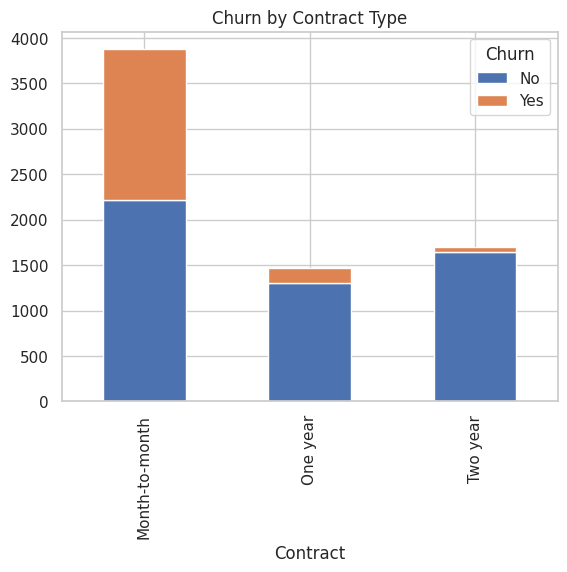

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load your dataset
data = pd.read_csv("/content/task 2.csv")
# Stacked Bar Chart
sns.set(style="whitegrid")
contract_churn = data.groupby(["Contract", "Churn"]).size().unstack()
contract_churn.plot(kind="bar", stacked=True)
plt.title("Churn by Contract Type")
plt.show()


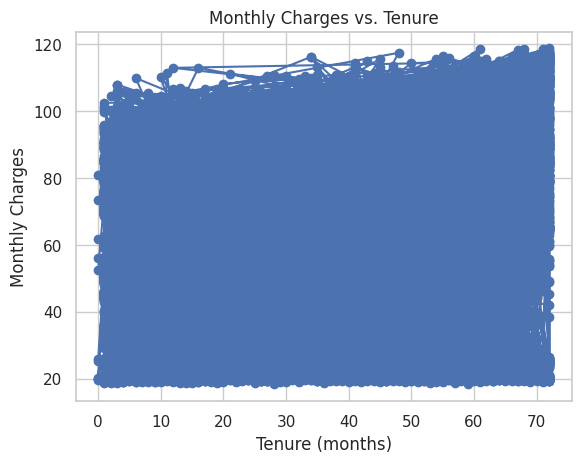

In [11]:
# Step 2: Extract relevant columns
tenure_series = data['tenure']  # Column for X-axis (tenure)
monthly_charges_series = data['MonthlyCharges']  # Column for Y-axis (MonthlyCharges)
# Step 3: Create the Line Chart
plt.plot(tenure_series, monthly_charges_series, marker='o', linestyle='-', color='b')
plt.title('Monthly Charges vs. Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges')
plt.grid(True)  # Add a grid
plt.show()

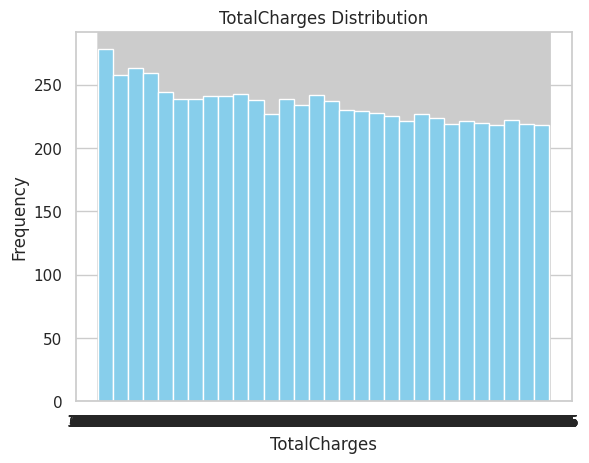

In [12]:
# Histogram
plt.hist(data['TotalCharges'], bins=30, color='skyblue')
plt.title('TotalCharges Distribution')
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.show()

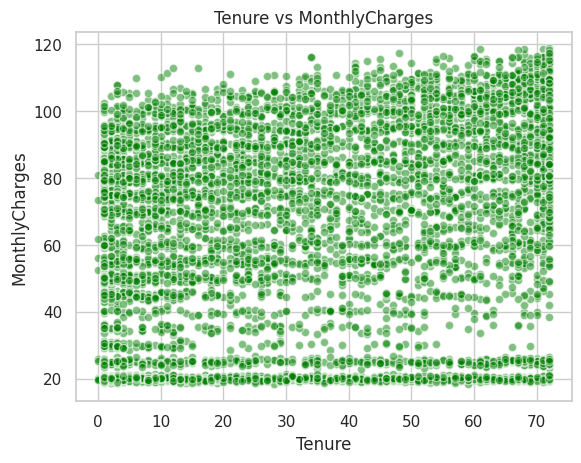

In [13]:
# Scatter Plot
plt.scatter(data['tenure'], data['MonthlyCharges'], alpha=0.5, c='green', edgecolors='w')
plt.title('Tenure vs MonthlyCharges')
plt.xlabel('Tenure')
plt.ylabel('MonthlyCharges')
plt.show()

<ipython-input-14-d4fd186ea442>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


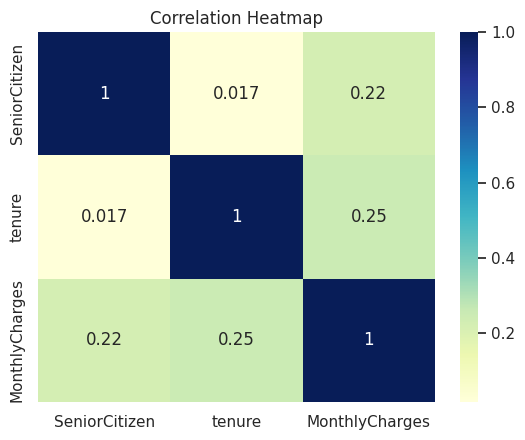

In [14]:
# Heat Map
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)
plt.title('Correlation Heatmap')
plt.show()